# Procesamiento de Imágenes - Trabajo Práctico N° 6

## Grupo 3
* Santiago Arribére
* Matias Francois
* Joaquín Gaytan
* Pablo Scheinfeld

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors

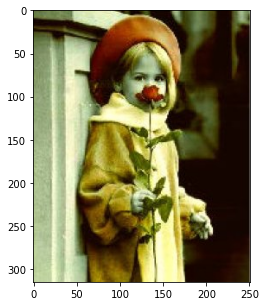

In [2]:
girl = cv2.cvtColor(cv2.imread('../assets/ninia_y_rosa.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(girl)
plt.show()

Como la intención es crear una máscara que incluya solo a la rosa para poder dejar a la misma en color y cambiar el fondo a escala de grises, primero se busca analizar cada canal de color por separado para observar si las firencias de color de la rosa son mayores en comparación al entorno, lo cual favorecería la segmentación de la imagen.

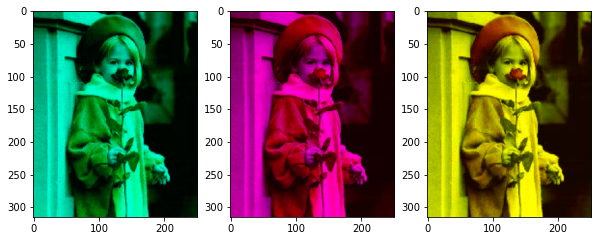

In [3]:
plt.figure(figsize=(10,5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    girl_temp = girl.copy()
    girl_temp[:,:,i]=0
    plt.imshow(girl_temp)
    
plt.show()

Como se puede observar los canales de color por separado no presentan un mejor escenario para la segmentacion en comparación con la imagen completa, por lo tanto lo que se realiza a continuación es obtener una mascara a partir de los colores en el area de la rosa, trabajando en el espacio de color HSV, debido que a que el mismo agrupa los colores por matiz, por lo cual si se desea filtrar un color particular, basta con tomar el rango de valores de hue que lo contengan para crear la mascara.

In [4]:
def get_mask(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light = (int(hsv_image[90:105,130:145,0].min()), int(hsv_image[90:105,130:145,1].min()), int(hsv_image[90:105,130:145,2].min()))
    dark = (int(hsv_image[90:105,130:145,0].max()), int(hsv_image[90:105,130:145,1].max()), int(hsv_image[90:105,130:145,2].max()))
    mask = cv2.inRange(hsv_image, light, dark)
    return mask.copy()

In [5]:
ma = get_mask(girl)

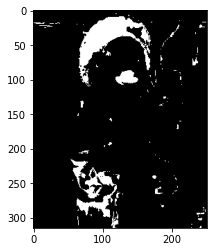

In [6]:
mask = ma
plt.imshow(mask, cmap="gray")

Una vez obtenida la mascara para la rosa es posible observar que otras zonas de la imagen presentan los mismos colores, como lo es el gorro de la niña, por ejemplo. Por lo tanto para poder obtener la mascara deseada se hará un recorte espacial en la zona de interés.

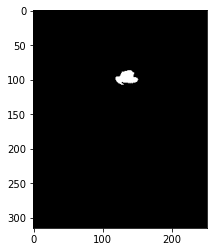

In [7]:
mask_b = (mask == 2)
mask_b[80:115,115:155] = mask[80:115,115:155]
plt.imshow(mask_b, cmap="gray")

Una vez obtenida la máscara que solo contempla a la rosa, se procede a generar la imagen final filtrando la rosa con la máscara generada, y generando el fondo en escala de grises a partir del negativo de la máscara de seada.

In [8]:
mask_final = mask_b.astype(np.uint8)*255
negative = (~mask_b).astype(np.uint8)*255

In [9]:
girl_negative = cv2.bitwise_and(girl, girl, mask=negative)
rose = cv2.bitwise_and(girl, girl, mask=mask_final)

In [10]:
grayscale = np.array([[np.array([int(p.mean())]*3) for p in line] for line in girl_negative])

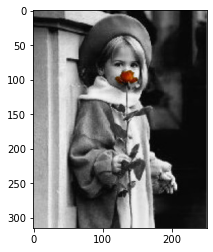

In [11]:
plt.imshow(grayscale + rose)

In [12]:
final_result = (grayscale + rose).astype(np.uint8)

In [14]:
cv2.imwrite('output/rose.jpg', cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR))

True